In [1]:
import pandas as pd

file_path = 'adult22.csv'
df = pd.read_csv(file_path)

selected_columns = ['SEX_A', 'AGEP_A', 'RACEALLP_A', 'HOUTENURE_A', 'REGION']
df_selected = df[selected_columns]

df_selected = df_selected[~df_selected['SEX_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['AGEP_A'].isin([97, 98, 99])]
df_selected = df_selected[~df_selected['RACEALLP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['HOUTENURE_A'].isin([7, 8, 9])]

def age_group(age):
    if 18 <= age <= 40:
        return 1
    elif 41 <= age <= 60:
        return 2
    elif 61 <= age <= 80:
        return 3
    elif age >= 81:
        return 4
    return None

df_selected['age_group'] = df_selected['AGEP_A'].apply(age_group)
print(df_selected.head())

   SEX_A  AGEP_A  RACEALLP_A  HOUTENURE_A  REGION  age_group
0      1      85           1            1       3          4
1      1      64           1            1       3          3
2      2      37           1            1       3          1
3      2      72           1            1       3          3
4      2      84           2            1       3          4


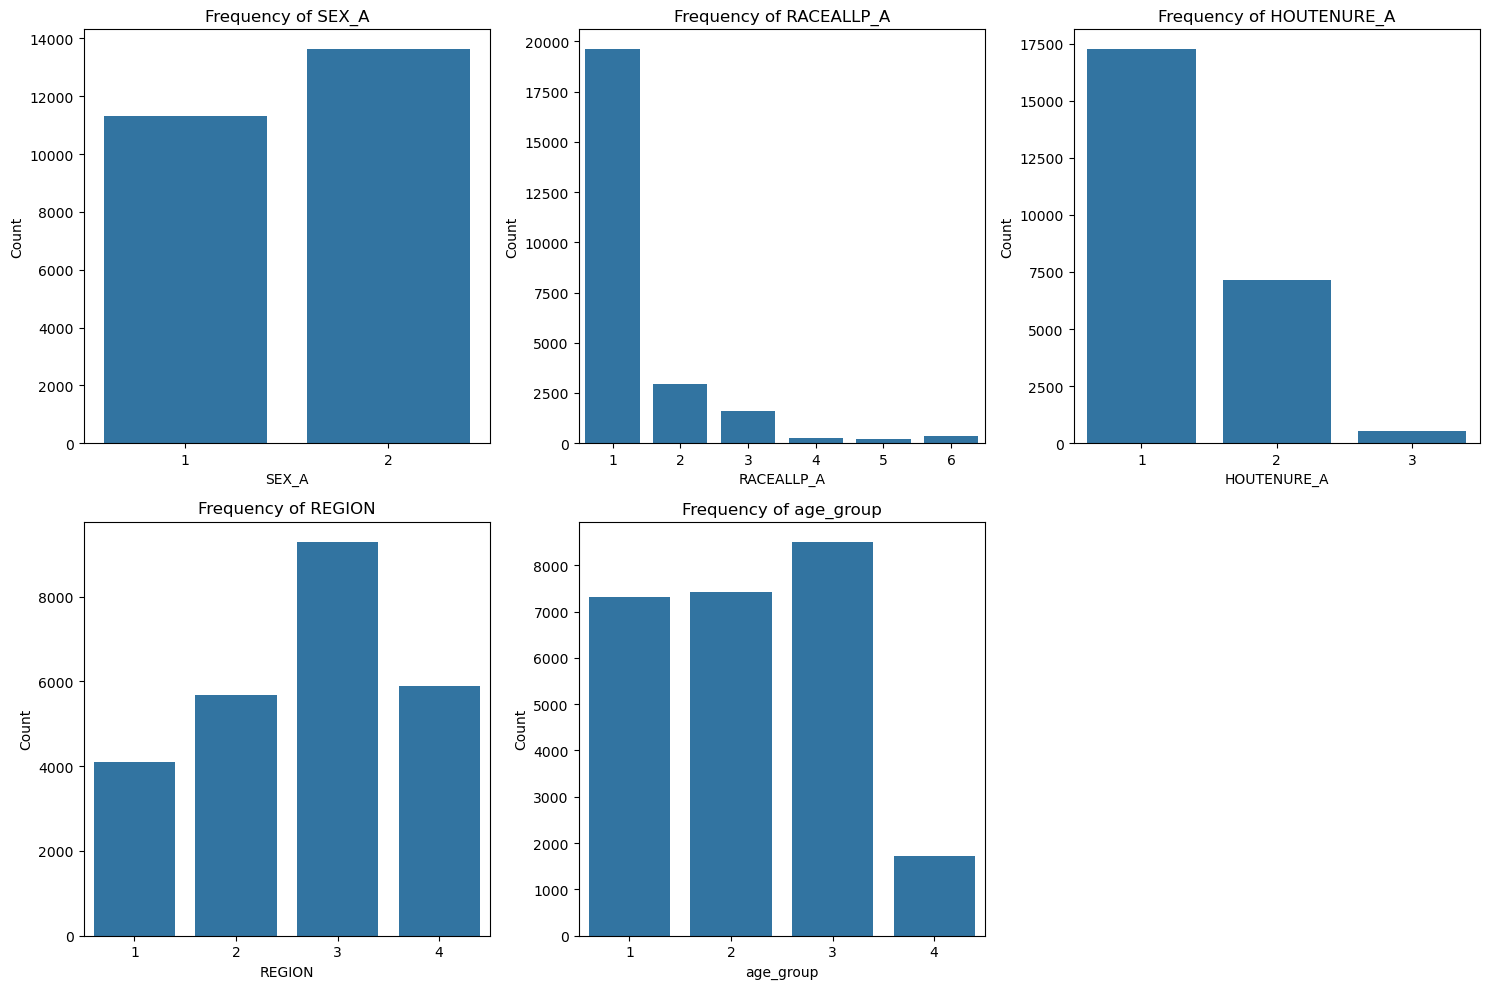

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['SEX_A', 'RACEALLP_A', 'HOUTENURE_A', 'REGION', 'age_group']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)  
    sns.countplot(data=df_selected, x=var)
    plt.title(f'Frequency of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.savefig('singelF.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

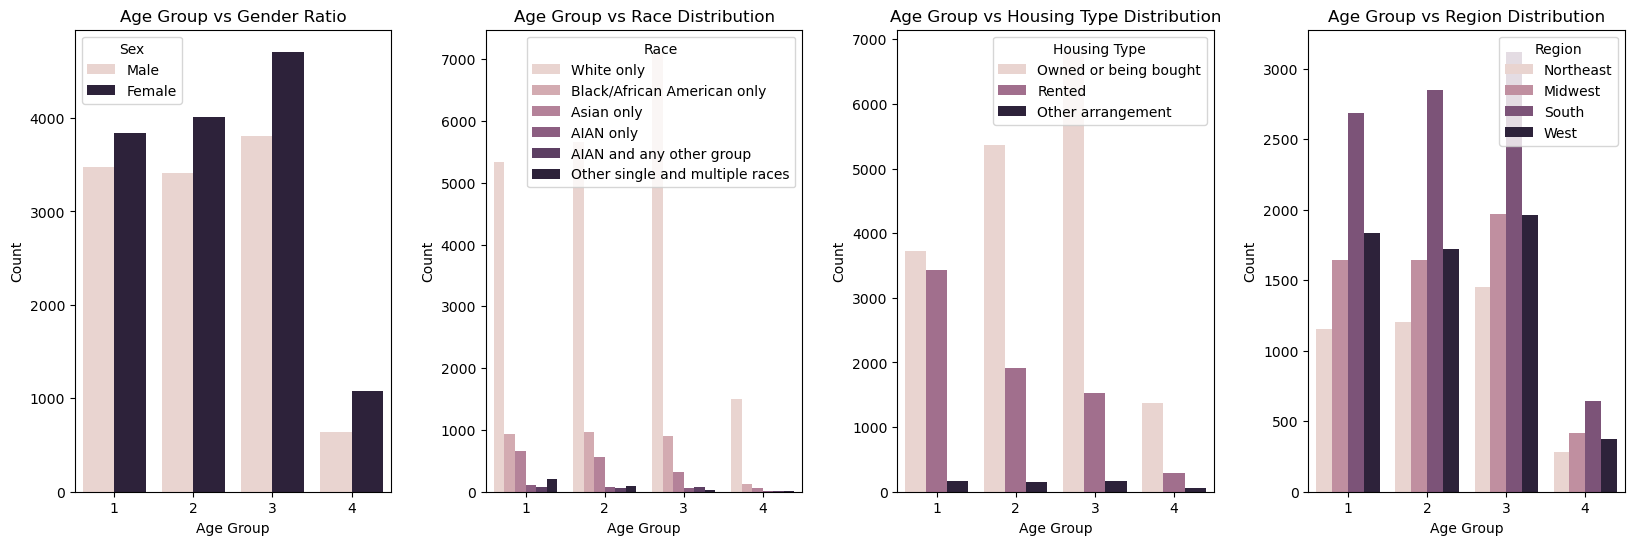

In [3]:
df_selected['age_group'] = df_selected['AGEP_A'].apply(age_group)

fig, axes = plt.subplots(1, 4, figsize=(20, 6))
plt.subplots_adjust(wspace=0.3)  

sns.countplot(data=df_selected, x='age_group', hue='SEX_A', ax=axes[0])
axes[0].set_title('Age Group vs Gender Ratio')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].legend(title='Sex', labels=['Male', 'Female'])

sns.countplot(data=df_selected, x='age_group', hue='RACEALLP_A', ax=axes[1])
axes[1].set_title('Age Group vs Race Distribution')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')
axes[1].legend(title='Race',labels=['White only', 'Black/African American only', 'Asian only', 'AIAN only', 'AIAN and any other group', 'Other single and multiple races'])

sns.countplot(data=df_selected, x='age_group', hue='HOUTENURE_A', ax=axes[2])
axes[2].set_title('Age Group vs Housing Type Distribution')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Count')
axes[2].legend(title='Housing Type', labels=['Owned or being bought', 'Rented', 'Other arrangement'])

sns.countplot(data=df_selected, x='age_group', hue='REGION', ax=axes[3])
axes[3].set_title('Age Group vs Region Distribution')
axes[3].set_xlabel('Age Group')
axes[3].set_ylabel('Count')
axes[3].legend(title='Region', labels=['Northeast', 'Midwest', 'South', 'West'])

plt.savefig('age_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

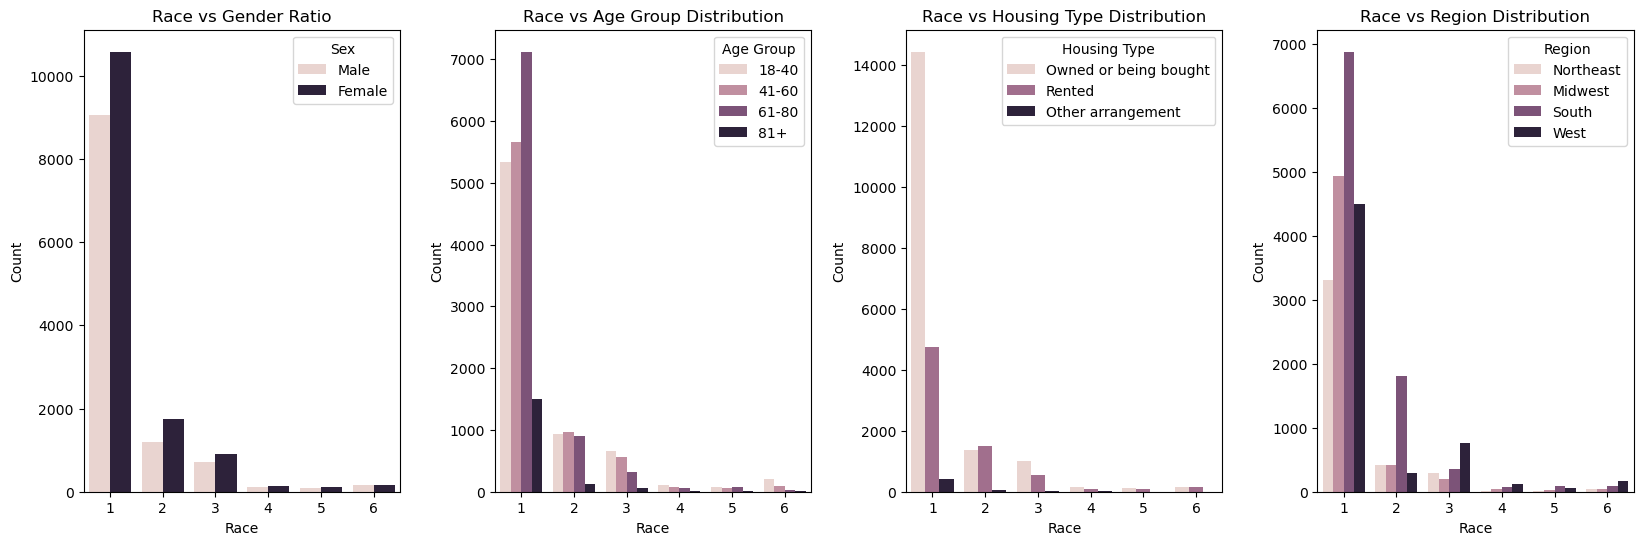

In [4]:
df_selected['age_group'] = df_selected['AGEP_A'].apply(age_group)

fig, axes = plt.subplots(1, 4, figsize=(20, 6))
plt.subplots_adjust(wspace=0.3)  

sns.countplot(data=df_selected, x='RACEALLP_A', hue='SEX_A', ax=axes[0])
axes[0].set_title('Race vs Gender Ratio')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Count')
axes[0].legend(title='Sex', labels=['Male', 'Female'])

sns.countplot(data=df_selected, x='RACEALLP_A', hue='age_group', ax=axes[1])
axes[1].set_title('Race vs Age Group Distribution')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Count')
axes[1].legend(title='Age Group', labels=['18-40', '41-60', '61-80', '81+'])

sns.countplot(data=df_selected, x='RACEALLP_A', hue='HOUTENURE_A', ax=axes[2])
axes[2].set_title('Race vs Housing Type Distribution')
axes[2].set_xlabel('Race')
axes[2].set_ylabel('Count')
axes[2].legend(title='Housing Type', labels=['Owned or being bought', 'Rented', 'Other arrangement'])

sns.countplot(data=df_selected, x='RACEALLP_A', hue='REGION', ax=axes[3])
axes[3].set_title('Race vs Region Distribution')
axes[3].set_xlabel('Race')
axes[3].set_ylabel('Count')
axes[3].legend(title='Region', labels=['Northeast', 'Midwest', 'South', 'West'])

plt.savefig('race_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

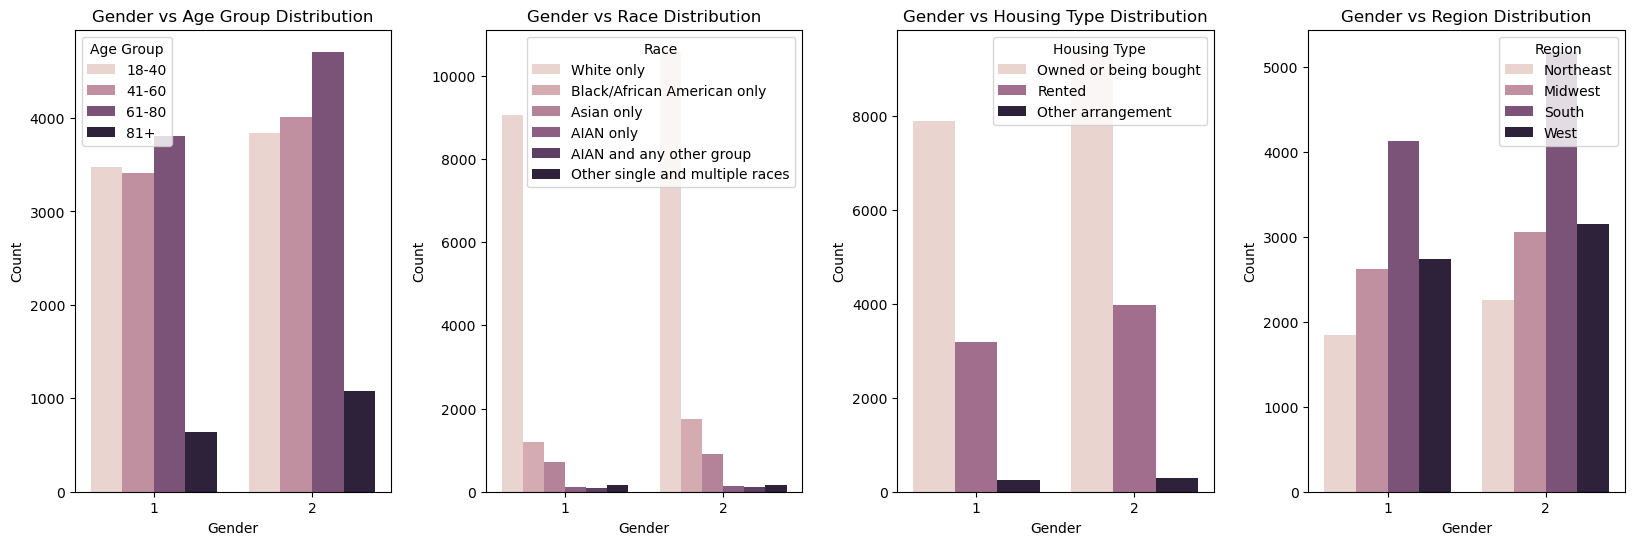

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
plt.subplots_adjust(wspace=0.3)  

sns.countplot(data=df_selected, x='SEX_A', hue='age_group', ax=axes[0])
axes[0].set_title('Gender vs Age Group Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].legend(title='Age Group', labels=['18-40', '41-60', '61-80', '81+'])

sns.countplot(data=df_selected, x='SEX_A', hue='RACEALLP_A', ax=axes[1])
axes[1].set_title('Gender vs Race Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].legend(title='Race', labels=['White only', 'Black/African American only', 'Asian only', 'AIAN only', 'AIAN and any other group', 'Other single and multiple races'])

sns.countplot(data=df_selected, x='SEX_A', hue='HOUTENURE_A', ax=axes[2])
axes[2].set_title('Gender vs Housing Type Distribution')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Count')
axes[2].legend(title='Housing Type', labels=['Owned or being bought', 'Rented', 'Other arrangement'])

sns.countplot(data=df_selected, x='SEX_A', hue='REGION', ax=axes[3])
axes[3].set_title('Gender vs Region Distribution')
axes[3].set_xlabel('Gender')
axes[3].set_ylabel('Count')
axes[3].legend(title='Region', labels=['Northeast', 'Midwest', 'South', 'West'])

plt.savefig('sex_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

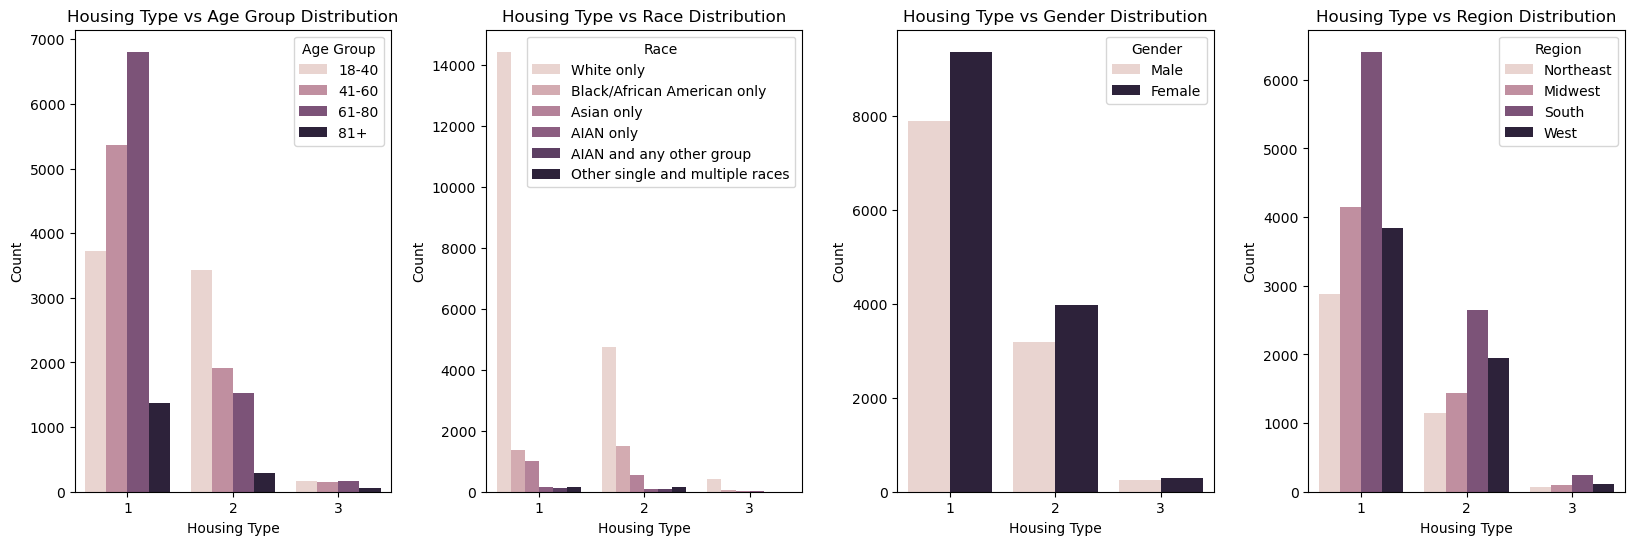

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
plt.subplots_adjust(wspace=0.3)

sns.countplot(data=df_selected, x='HOUTENURE_A', hue='age_group', ax=axes[0])
axes[0].set_title('Housing Type vs Age Group Distribution')
axes[0].set_xlabel('Housing Type')
axes[0].set_ylabel('Count')
axes[0].legend(title='Age Group', labels=['18-40', '41-60', '61-80', '81+'])

sns.countplot(data=df_selected, x='HOUTENURE_A', hue='RACEALLP_A', ax=axes[1])
axes[1].set_title('Housing Type vs Race Distribution')
axes[1].set_xlabel('Housing Type')
axes[1].set_ylabel('Count')
axes[1].legend(title='Race', labels=['White only', 'Black/African American only', 'Asian only', 'AIAN only', 'AIAN and any other group', 'Other single and multiple races'])

sns.countplot(data=df_selected, x='HOUTENURE_A', hue='SEX_A', ax=axes[2])
axes[2].set_title('Housing Type vs Gender Distribution')
axes[2].set_xlabel('Housing Type')
axes[2].set_ylabel('Count')
axes[2].legend(title='Gender', labels=['Male', 'Female'])

sns.countplot(data=df_selected, x='HOUTENURE_A', hue='REGION', ax=axes[3])
axes[3].set_title('Housing Type vs Region Distribution')
axes[3].set_xlabel('Housing Type')
axes[3].set_ylabel('Count')
axes[3].legend(title='Region', labels=['Northeast', 'Midwest', 'South', 'West'])

plt.savefig('house_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

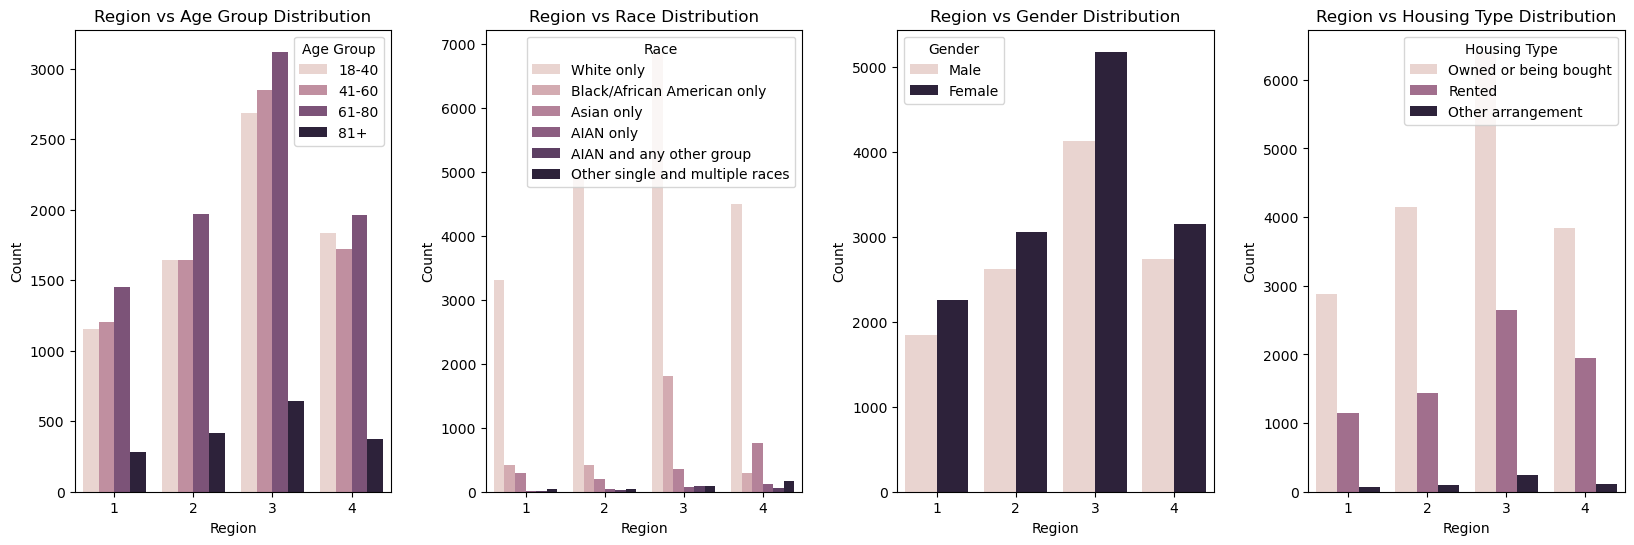

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
plt.subplots_adjust(wspace=0.3)

sns.countplot(data=df_selected, x='REGION', hue='age_group', ax=axes[0])
axes[0].set_title('Region vs Age Group Distribution')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Count')
axes[0].legend(title='Age Group', labels=['18-40', '41-60', '61-80', '81+'])

sns.countplot(data=df_selected, x='REGION', hue='RACEALLP_A', ax=axes[1])
axes[1].set_title('Region vs Race Distribution')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Count')
axes[1].legend(title='Race',labels=['White only', 'Black/African American only', 'Asian only', 'AIAN only', 'AIAN and any other group', 'Other single and multiple races'])

sns.countplot(data=df_selected, x='REGION', hue='SEX_A', ax=axes[2])
axes[2].set_title('Region vs Gender Distribution')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Count')
axes[2].legend(title='Gender', labels=['Male', 'Female'])

sns.countplot(data=df_selected, x='REGION', hue='HOUTENURE_A', ax=axes[3])
axes[3].set_title('Region vs Housing Type Distribution')
axes[3].set_xlabel('Region')
axes[3].set_ylabel('Count')
axes[3].legend(title='Housing Type', labels=['Owned or being bought', 'Rented', 'Other arrangement'])

plt.savefig('region_distributions.png', dpi=300, bbox_inches='tight')
plt.show()